# Move Beyond Linearity

In [234]:
#load mudules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrix
from math import sqrt
from sklearn.metrics import mean_squared_error

In [5]:
wage = pd.read_csv('Dataset/Wage.csv', index_col=0)
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [6]:
wage.sex.value_counts()

1. Male    3000
Name: sex, dtype: int64

In [7]:
wage.race.value_counts()

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

In [8]:
wage.education.value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

In [9]:
wage.region.value_counts()

2. Middle Atlantic    3000
Name: region, dtype: int64

In [10]:
wage.health.value_counts()

2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

In [11]:
wage.health_ins.value_counts()

1. Yes    2083
2. No      917
Name: health_ins, dtype: int64

In [12]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 304.7+ KB


In [13]:
wage.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [17]:
dummies =pd.get_dummies(wage[['sex','maritl','race','education','region', 'jobclass','health', 'health_ins']],drop_first=True)

In [18]:
dummies.head()

,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
231655,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86582,0,0,0,0,0,0,0,0,0,1,0,1,1,1
161300,1,0,0,0,0,0,0,0,1,0,0,0,0,0
155159,1,0,0,0,0,1,0,0,0,1,0,1,1,0
11443,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [19]:
wage= wage.drop(['sex','maritl','race','education','region', 'jobclass','health', 'health_ins'],axis=1)

In [23]:
df= pd.concat([wage, dummies], axis =1)

In [24]:
df.head()

,year,age,logwage,wage,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
231655,2006,18,4.318063,75.043154,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86582,2004,24,4.255273,70.476020,0,0,0,0,0,0,0,0,0,1,0,1,1,1
161300,2003,45,4.875061,130.982177,1,0,0,0,0,0,0,0,1,0,0,0,0,0
155159,2003,43,5.041393,154.685293,1,0,0,0,0,1,0,0,0,1,0,1,1,0
11443,2005,50,4.318063,75.043154,0,0,1,0,0,0,0,1,0,0,0,1,0,0


## Polynomial Regression

In [42]:
x1=PolynomialFeatures(1).fit_transform(wage.age[:,None])
x2=PolynomialFeatures(2).fit_transform(wage.age[:,None])
x3=PolynomialFeatures(3).fit_transform(wage.age[:,None])
x4=PolynomialFeatures(4).fit_transform(wage.age[:,None])
x5=PolynomialFeatures(5).fit_transform(wage.age[:,None])

y= (wage.wage >250).map({True:1, False:0}).values

In [91]:
model1 = sm.GLS(wage.wage, x4).fit()
print(model1.summary())
clf = sm.GLM(y, x4, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(age_grid)
pred = res.predict(X_test)


                            GLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            GLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           2.77e-57
Time:                        13:48:31   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

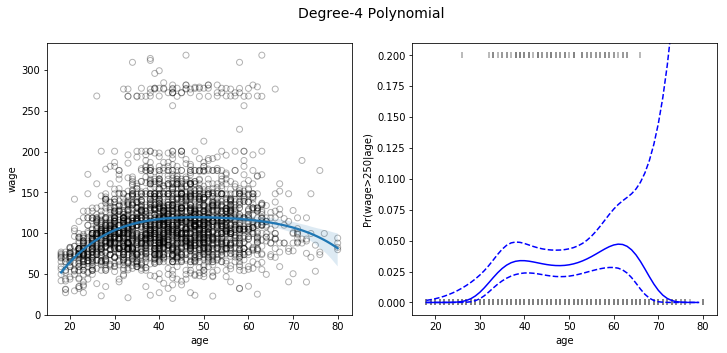

In [127]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

ax1.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(wage.age, wage.wage, order = 4, truncate=True, scatter=False, ax=ax1)
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(age_grid, pred, color='b')

predictions = res.get_prediction(X_test)
tmp = predictions.summary_frame(alpha=0.05)[['mean_ci_lower', 'mean_ci_upper']]
ax2.plot(age_grid, tmp['mean_ci_upper'], color='b', linestyle='--')
ax2.plot(age_grid, tmp['mean_ci_lower'], color='b', linestyle='--')
# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(wage.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

## Step Function

In [150]:
df_cut, bins = pd.cut(wage.age, 4, retbins=True, right=True)
df_steps = pd.concat([wage.age, df_cut, wage.wage], keys=['age','age_cuts','wage'], axis=1)
df_steps.head()

,age,age_cuts,wage
231655,18,"(17.938, 33.5]",75.043154
86582,24,"(17.938, 33.5]",70.476020
161300,45,"(33.5, 49.0]",130.982177
155159,43,"(33.5, 49.0]",154.685293
11443,50,"(49.0, 64.5]",75.043154


In [151]:
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)
# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test2.head()df_steps_dummies.head(5)

,const,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
231655,1.0,1,0,0,0
86582,1.0,1,0,0,0
161300,1.0,0,1,0,0
155159,1.0,0,1,0,0
11443,1.0,0,0,1,0


In [152]:
fit3 = sm.GLM(df_steps.wage, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1)).fit()
fit3.summary().tables[1]


,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416


In [153]:

# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(age_grid.ravel(), bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [154]:
# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test2.head()

,const,2,3,4
0,1.0,0,0,0
1,1.0,0,0,0
2,1.0,0,0,0
3,1.0,0,0,0
4,1.0,0,0,0


In [155]:

pred2 = fit3.predict(X_test2)

In [156]:

clf2 = sm.GLM(y, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1),
              family=sm.families.Binomial(sm.families.links.logit))
res2 = clf2.fit()
pred3 = res2.predict(X_test2)

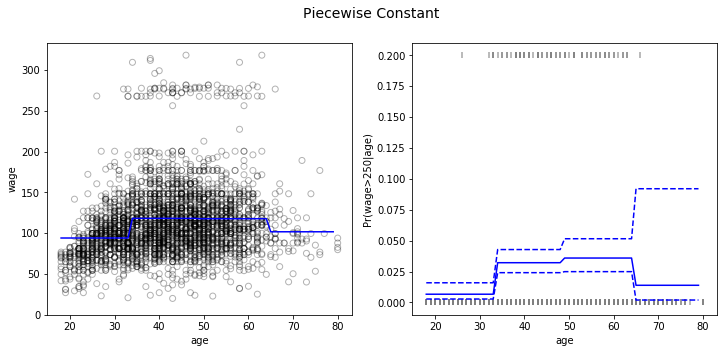

In [161]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(np.arange(wage.age.min(), wage.age.max()).reshape(-1,1), pred3, color='b')
predictions2 = res2.get_prediction(X_test2)
tmp2 = predictions2.summary_frame(alpha=0.05)[['mean_ci_lower', 'mean_ci_upper']]

ax2.plot(np.arange(wage.age.min(), wage.age.max()).reshape(-1,1), tmp2['mean_ci_lower'], color ='blue', linestyle ='--')
ax2.plot(np.arange(wage.age.min(), wage.age.max()).reshape(-1,1), tmp2['mean_ci_upper'], color= 'blue',linestyle ='--')


# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(wage.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

## Regression splines

In [171]:
#  piecewise cubic
x_above50= wage.where(wage.age >50)

In [174]:
x_above50=x_above50.dropna()

In [175]:
x_below50= wage.where(wage.age <=50)
x_below50 = x_below50.dropna()

In [180]:
x3_above=PolynomialFeatures(3).fit_transform(x_above50.age[:,None])
mod1=sm.GLS(x_above50.wage, x3_above).fit()
print(mod1.summary())
x3_below=PolynomialFeatures(3).fit_transform(x_below50.age[:,None])
mod2= sm.GLS(x_below50.wage, x3_below).fit()
print(mod2.summary())

                            GLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.014
Model:                            GLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.488
Date:                Fri, 19 Apr 2019   Prob (F-statistic):             0.0155
Time:                        15:43:21   Log-Likelihood:                -3921.2
No. Observations:                 756   AIC:                             7850.
Df Residuals:                     752   BIC:                             7869.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -727.4495   1072.400     -0.678      0.4

In [ ]:
mod1_pred= mod1.fit(age_grid)

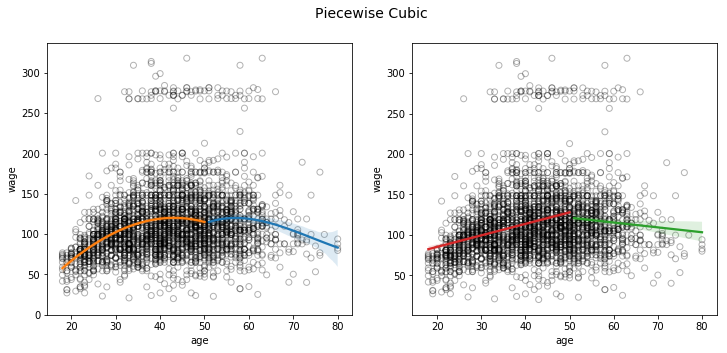

In [187]:
#Continuous Piecewise Cubic
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Piecewise Cubic', fontsize=14)
ax1.scatter(x_above50.age, x_above50.wage,color ='blue', facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(x_above50.age, x_above50.wage, order = 3, truncate=True, scatter=False, ax=ax1)
ax1.scatter(x_below50.age, x_below50.wage,color ='red', facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(x_below50.age, x_below50.wage, order = 3, truncate=True, scatter=False, ax=ax1)

ax1.set_ylim(ymin=0)

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

# piecewise regression

ax2.scatter(x_above50.age, x_above50.wage,color ='blue', facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(x_above50.age, x_above50.wage, order = 1, truncate=True, scatter=False, ax=ax2)
ax2.scatter(x_below50.age, x_below50.wage,color ='red', facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(x_below50.age, x_below50.wage, order = 1, truncate=True, scatter=False, ax=ax2)



## Cubic Spline vs Natural Cubic Spline

In [190]:
#choose 3 knots
# Specifying 3 knots
transformed_x = dmatrix("bs(wage.age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"wage.age": wage.age}, return_type='dataframe')
fit4 = sm.GLM(df.wage, transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit4.params

Intercept                                                                 60.493714
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [238]:
#natrual spine
# Specifying 3 degrees of freedom
transformed_x3 = dmatrix("cr(wage.age, df=3)", {"wage.age": wage.age}, return_type='dataframe')
fit6 = sm.GLM(wage.wage, transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(age_grid, df=3)", {"age_grid": age_grid}, return_type='dataframe'))
fit6.params

Intercept                68.966859
cr(wage.age, df=3)[0]     3.994022
cr(wage.age, df=3)[1]    53.197793
cr(wage.age, df=3)[2]    11.775044
dtype: float64

In [218]:
X_test4= dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe')

predictions4 = fit4.get_prediction(X_test4)
tmp4 = predictions4.summary_frame(alpha=0.05)[['mean_ci_lower', 'mean_ci_upper']]


X_test6= dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe')
predictions6 = fit6.get_prediction(X_test6)
tmp6 = predictions6.summary_frame(alpha=0.05)[['mean_ci_lower', 'mean_ci_upper']]

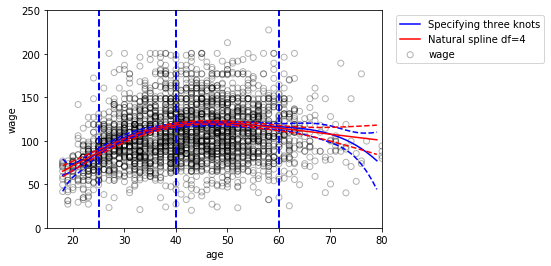

In [227]:
plt.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid, pred4, color='b', label='Specifying three knots')
plt.plot(age_grid, pred6, color='r', label='Natural spline df=4')
plt.plot(age_grid, tmp4['mean_ci_lower'],color ='b', linestyle='--', label='_nolegend_')
plt.plot(age_grid, tmp4['mean_ci_upper'],color= 'b',linestyle ='--',label='_nolegend_')
plt.plot(age_grid, tmp6['mean_ci_lower'], color ='r',linestyle ='--', label='_nolegend_')
plt.plot(age_grid, tmp6['mean_ci_upper'], color ='r',linestyle ='--', label='_nolegend_')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.xlim(15,80)
plt.ylim(0,250)
plt.xlabel('age')
plt.ylabel('wage');

## Choosing the number  and locations of the knots

In [230]:
df = np.arange(1,11)
df

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [229]:
for i in df:
    transformed_x7 = dmatrix("cr(wage.age, df=i)", {"wage.age": wage.age}, return_type='dataframe')
    fit7 = sm.GLM(wage.wage, transformed_x3).fit()
    pred7 = fit7.predict(dmatrix("cr(age_grid, df=i)", {"age_grid": age_grid}, return_type='dataframe'))
    

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [236]:
wage.wage.shape

(3000,)

In [237]:
pred6.shape

(62,)